In [17]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/dtree.model.sav", "rb"))
features = (
    pd.read_csv("data/density_train.csv", sep=";", decimal=",")
    .drop(["Density"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- Al2O3 <= 0.18
|   |--- TiO2 <= 0.18
|   |   |--- T <= 32.50
|   |   |   |--- TiO2 <= 0.03
|   |   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |   |--- T <= 22.50
|   |   |   |   |   |   |--- value: [1.06]
|   |   |   |   |   |--- T >  22.50
|   |   |   |   |   |   |--- value: [1.06]
|   |   |   |   |--- Al2O3 >  0.03
|   |   |   |   |   |--- value: [1.09]
|   |   |   |--- TiO2 >  0.03
|   |   |   |   |--- T <= 27.50
|   |   |   |   |   |--- T <= 22.50
|   |   |   |   |   |   |--- value: [1.09]
|   |   |   |   |   |--- T >  22.50
|   |   |   |   |   |   |--- value: [1.09]
|   |   |   |   |--- T >  27.50
|   |   |   |   |   |--- value: [1.08]
|   |   |--- T >  32.50
|   |   |   |--- TiO2 <= 0.03
|   |   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |   |--- T <= 55.00
|   |   |   |   |   |   |--- T <= 47.50
|   |   |   |   |   |   |   |--- value: [1.05]
|   |   |   |   |   |   |--- T >  47.50
|   |   |   |   |   |   |   |--- value: [1.04]
|   |   |   |   |   |--- T >  55.00
|   |   |   

In [18]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

34

[if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T > 55.0) and (T > 62.5) -> 1.033,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T > 55.0) and (T <= 62.5) -> 1.038,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (TiO2 <= 0.025) and (Al2O3 > 0.025) -> 1.088,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (TiO2 > 0.025) and (T <= 27.5) and (T <= 22.5) -> 1.091,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (TiO2 > 0.025) and (T <= 27.5) and (T > 22.5) -> 1.088,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (TiO2 > 0.025) and (T > 27.5) -> 1.084,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T <= 55.0) and (T <= 47.5) -> 1.051,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T <= 55.0) and (T > 47.5) -> 1.045,
 if (

In [19]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

34

[if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) -> 1.033,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 62.5) -> 1.038,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.088,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T <= 32.5) -> 1.091,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T <= 32.5) and (T > 22.5) -> 1.088,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T <= 32.5) and (T > 27.5) -> 1.084,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.051,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.045,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (T > 22.5) -> 1.06,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.062,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 60.0) -> 1.069,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) an

In [20]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
for_cluster = rules.copy()
rules

24

[if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) -> 1.033,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 62.5) -> 1.038,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.088,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T <= 32.5) -> 1.091,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T <= 32.5) and (T > 22.5) -> 1.088,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T <= 32.5) and (T > 27.5) -> 1.084,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.048,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (T > 22.5) -> 1.06,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.062,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 60.0) -> 1.067,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 67.5) -> 1.057,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) an

In [21]:
density_train = pd.read_csv("data/density_train.csv", sep=";", decimal=",")
density_test = pd.read_csv("data/density_test.csv", sep=";", decimal=",")

display(density_train.head(3))
display(density_test.head(3))

T  Al2O3  TiO2  Density
0  20    0.0   0.0  1.06250
1  25    0.0   0.0  1.05979
2  35    0.0   0.0  1.05404

T  Al2O3  TiO2  Density
0  30   0.00   0.0  1.05696
1  55   0.00   0.0  1.04158
2  25   0.05   0.0  1.08438

In [22]:
from src.rules import simplify_rules

rules = simplify_rules(density_train, rules)
rules

[if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 70) -> 1.033,
 if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 47.5) -> 1.038,
 if (Al2O3 = 0.1) and (TiO2 = 0.0) and (T = 20) -> 1.088,
 if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 20) -> 1.091,
 if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 27.5) -> 1.088,
 if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 30.0) -> 1.084,
 if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 43.75) -> 1.048,
 if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 27.5) -> 1.06,
 if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 20) -> 1.062,
 if (Al2O3 = 0.1) and (TiO2 = 0.0) and (T = 46.25) -> 1.067,
 if (Al2O3 = 0.1) and (TiO2 = 0.0) and (T = 50.0) -> 1.057,
 if (Al2O3 = 0.1) and (TiO2 = 0.0) and (T = 70) -> 1.053,
 if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 41.25) -> 1.079,
 if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 50.0) -> 1.062,
 if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 70) -> 1.056,
 if (Al2O3 = 0.0) and (TiO2 = 0.3) and (T = 20) -> 1.219,
 if (Al2O3 = 0.0) and (TiO2 = 0.3) and (T = 35.0) ->

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


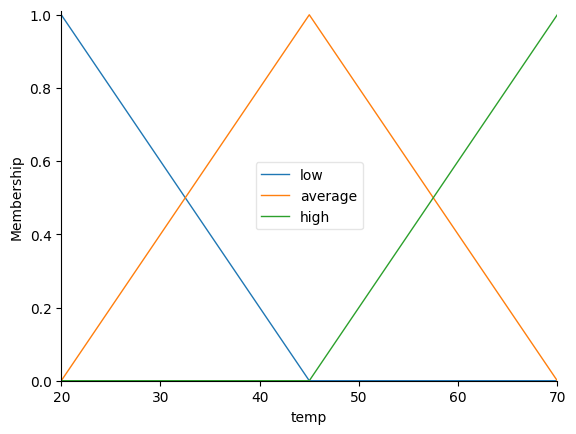

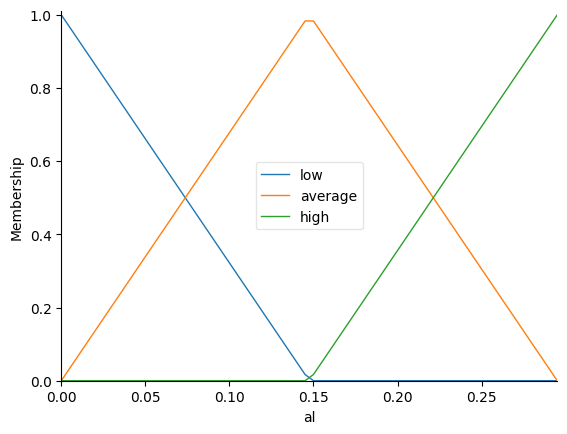

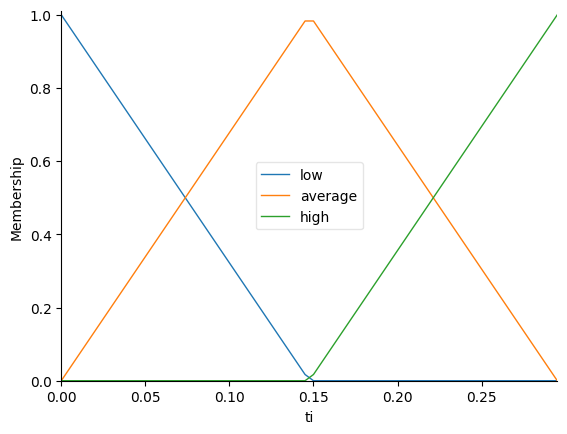

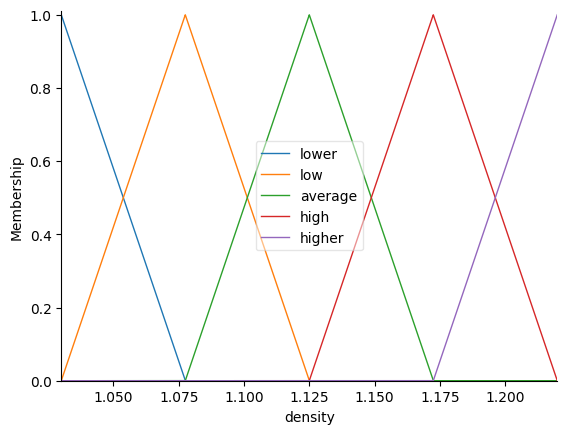

In [23]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

temp = ctrl.Antecedent(density_train["T"].sort_values().unique(), "temp")
al = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "ti")
density = ctrl.Consequent(np.arange(1.03, 1.22, 0.00001), "density")

temp.automf(3, variable_type="quant")
temp.view()
al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
density.automf(5, variable_type="quant")
density.view()

In [24]:
from src.rules import  get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "T": temp, "consequent": density}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

15

[IF (al[low] AND ti[low]) AND temp[high] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[average] AND ti[low]) AND temp[low] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[average]) AND temp[low] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[low]) AND temp[average] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[low]) AND temp[low] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[average] AND ti[low]) AND temp[average] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[average] AND ti[low]) AND temp[high] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[average]) AND temp[average] THEN density[low]
 	AND aggrega

 Antecedents 
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: temp                    = 25
  - low                             : 0.8
  - average                         : 0.2
  - high                            : 0.0

 Rules 
RULE #0:
  IF (al[low] AND ti[low]) AND temp[high] THEN density[lower]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - al[low]                                                : 1.0
  - ti[low]                                                : 1.0
  - temp[high]                                             : 0.0
                      (al[low] AND ti[low]) AND temp[high] = 0.0
  Activation (THEN-clause):
                     

np.float64(1.076592785948375)

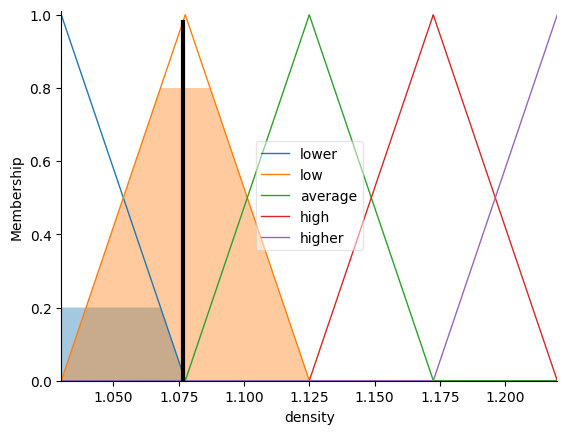

In [25]:
sim.input["temp"] = 25
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.compute()
sim.print_state()
display(sim.output["density"])
density.view(sim=sim)

In [26]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["temp"] = row["T"]
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.compute()
    return sim.output["density"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))

result_train = density_train.copy()
result_train["Real"] = result_train["Density"]
result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train.head(15)

T  Al2O3  TiO2  Density     Real  Inferred      RMSE
0   20   0.00   0.0  1.06250  1.06250  1.077498  0.014998
1   25   0.00   0.0  1.05979  1.05979  1.076593  0.016803
2   35   0.00   0.0  1.05404  1.05404  1.069156  0.015116
3   40   0.00   0.0  1.05103  1.05103  1.061106  0.010076
4   45   0.00   0.0  1.04794  1.04794  1.045833  0.002107
5   50   0.00   0.0  1.04477  1.04477  1.046360  0.001590
6   60   0.00   0.0  1.03826  1.03826  1.047642  0.009382
7   65   0.00   0.0  1.03484  1.03484  1.046360  0.011520
8   70   0.00   0.0  1.03182  1.03182  1.045833  0.014013
9   20   0.05   0.0  1.08755  1.08755  1.077498  0.010052
10  45   0.05   0.0  1.07105  1.07105  1.067145  0.003905
11  50   0.05   0.0  1.06760  1.06760  1.067145  0.000455
12  55   0.05   0.0  1.06409  1.06409  1.067988  0.003898
13  65   0.05   0.0  1.05691  1.05691  1.062538  0.005628
14  70   0.05   0.0  1.05291  1.05291  1.047191  0.005719

In [27]:
result_test = density_test.copy()
result_test["Real"] = result_test["Density"]
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
# result_test["RMSE"] = result_test["RMSE"].apply(lambda x: "{:,.4f}".format(x))
result_test = result_test.round({"RMSE": 3})
result_test

T  Al2O3  TiO2  Density     Real  Inferred   RMSE
0   30   0.00  0.00  1.05696  1.05696  1.073918  0.017
1   55   0.00  0.00  1.04158  1.04158  1.047642  0.006
2   25   0.05  0.00  1.08438  1.08438  1.076518  0.008
3   30   0.05  0.00  1.08112  1.08112  1.073918  0.007
4   35   0.05  0.00  1.07781  1.07781  1.069156  0.009
5   40   0.05  0.00  1.07446  1.07446  1.067145  0.007
6   60   0.05  0.00  1.06053  1.06053  1.067988  0.007
7   35   0.30  0.00  1.17459  1.17459  1.172492  0.002
8   65   0.30  0.00  1.14812  1.14812  1.136460  0.012
9   45   0.00  0.05  1.07424  1.07424  1.067145  0.007
10  50   0.00  0.05  1.07075  1.07075  1.067145  0.004
11  55   0.00  0.05  1.06721  1.06721  1.067988  0.001
12  20   0.00  0.30  1.22417  1.22417  1.204157  0.020
13  30   0.00  0.30  1.21310  1.21310  1.202348  0.011
14  40   0.00  0.30  1.20265  1.20265  1.203630  0.001
15  60   0.00  0.30  1.18265  1.18265  1.176072  0.007
16  70   0.00  0.30  1.17261  1.17261  1.172492  0.000

In [28]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 0.009765373953597112,
 'RMSE_test': 0.009031443610368107,
 'RMAE_test': 0.08581225574298121,
 'R2_test': 0.978451748357252}

In [29]:
from src.rules import get_features, vectorize_rules

features = get_features(for_cluster, ["T"])
print(features)

df_rules = vectorize_rules(for_cluster, features)
df_rules.head(5)

['(Al2O3 <= 0.175)', '(Al2O3 > 0.025)', '(Al2O3 > 0.175)', '(TiO2 <= 0.175)', '(TiO2 > 0.025)', '(TiO2 > 0.175)']


(Al2O3 <= 0.175)  \
rule                                                                  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...                1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...                1   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...                1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...                1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...                1   

                                                   (Al2O3 > 0.025)  \
rule                                                                 
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               0   

                                                   (Al2O3 > 0.175)  \
rule                                                                 
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               0   

                                                   (TiO2 <= 0.175)  \
rule                                                                 
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               1   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               1   

                                                   (TiO2 > 0.025)  \
rule                                                                
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...              1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...              1   

                                                   (TiO2 > 0.175)  \
rule                                                                
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...              0   

                                                            consequent  
rule                                                                    
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...  1.0333299999999999  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...             1.03826  
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...             1.08755  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...             1.09098  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...             1.08775

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


{2: 0.3980189385393544,
 3: 0.6922181892757754,
 4: 0.8221763769597347,
 5: 1.0,
 6: 1.0}

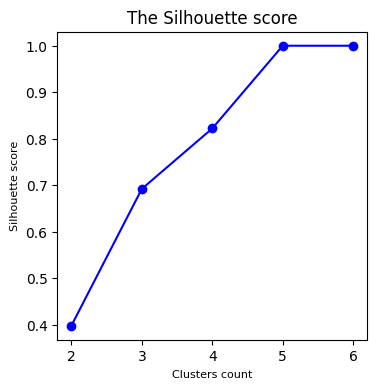

'The best clusters count is 5'

In [30]:
from src.cluster_helper import draw_best_clusters_plot, get_best_clusters_num

random_state = 9

X = df_rules.copy()
X = X.drop(["consequent"], axis=1)

clusters_score = get_best_clusters_num(X, random_state)
display(clusters_score)

draw_best_clusters_plot(clusters_score)

clusters_num = sorted(clusters_score.items(), key=lambda x: x[1], reverse=True)[0][0]
display(f"The best clusters count is {clusters_num}")

In [31]:
from sklearn import cluster

from src.cluster_helper import print_cluster_result

kmeans = cluster.KMeans(n_clusters=clusters_num, random_state=random_state)
kmeans.fit(X)

print_cluster_result(X, clusters_num, kmeans.labels_)

Кластер 1 (5):
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) -> 1.033;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 62.5) -> 1.038;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.048;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (T > 22.5) -> 1.06;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.062
--------
Кластер 2 (4):
if (Al2O3 <= 0.175) and (TiO2 > 0.175) and (T <= 40.0) -> 1.219;
if (Al2O3 <= 0.175) and (TiO2 > 0.175) and (T <= 40.0) and (T > 30.0) -> 1.208;
if (Al2O3 <= 0.175) and (TiO2 > 0.175) and (T > 40.0) and (T <= 60.0) -> 1.193;
if (Al2O3 <= 0.175) and (TiO2 > 0.175) and (T > 40.0) -> 1.178
--------
Кластер 3 (5):
if (Al2O3 > 0.175) and (T <= 35.0) -> 1.189;
if (Al2O3 > 0.175) and (T <= 35.0) and (T > 22.5) -> 1.182;
if (Al2O3 > 0.175) and (T > 35.0) and (T <= 52.5) -> 1.166;
if (Al2O3 > 0.175) and (T > 35.0) and (T <= 65.0) -> 1.155;
if (Al2O3 > 0.175) and (T > 35.0) -> 1.144
--------
